In [31]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
df = pd.read_excel("data/Waste Export UN Comtrade Dataset.xlsx")

In [21]:
df['Trade Value (US$)'] = df['Trade Value (US$)'].replace(['\$',','],['',''], regex=True)
df['Trade_Value_US$'] = df['Trade Value (US$)'].astype('float')
df['Net_Weight_kg'] = df['Net Weight(kg)'].astype('float')
df = df[df['Partner'] != "World"]
df

,Period,Trade Flow,Reporter,Partner,2nd Partner,Customs Desc,Transport Mode,Commodity Code,Trade Value (US$),Net Weight(kg),Gross Weight,Qty Unit,Qty,Alternate Quantity unit,Alternate Quantity,Trade_Value_US$,Net_Weight_kg
1,2022,X,Andorra,Spain,World,TOTAL CPC,TOTAL MOT,3915,292208.0,2510814.0,NaN,kg,2510814.0,kg,2510814.0,292208.0,2510814.0
3,2022,X,Azerbaijan,Latvia,World,TOTAL CPC,TOTAL MOT,3915,877046.0,681600.0,NaN,kg,681600.0,kg,681600.0,877046.0,681600.0
4,2022,X,Azerbaijan,Lithuania,World,TOTAL CPC,TOTAL MOT,3915,31371.0,25000.0,NaN,kg,25000.0,kg,25000.0,31371.0,25000.0
5,2022,X,Azerbaijan,Russian Federation,World,TOTAL CPC,TOTAL MOT,3915,991195.0,954548.0,NaN,kg,954548.0,kg,954548.0,991195.0,954548.0
6,2022,X,Azerbaijan,Türkiye,World,TOTAL CPC,TOTAL MOT,3915,88807.0,105562.0,NaN,kg,105562.0,kg,105562.0,88807.0,105562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,2022,X,Uruguay,Viet Nam,World,TOTAL CPC,TOTAL MOT,3915,12251.0,63820.0,NaN,kg,63820.0,kg,63820.0,12251.0,63820.0
1559,2022,X,Uzbekistan,Afghanistan,World,TOTAL CPC,TOTAL MOT,3915,23899.0,108630.0,NaN,kg,108630.0,1000 KG,108.0,23899.0,108630.0
1560,2022,X,Uzbekistan,Kyrgyzstan,World,TOTAL CPC,TOTAL MOT,3915,255.0,980.0,NaN,kg,980.0,1000 KG,0.0,255.0,980.0
1561,2022,X,Uzbekistan,Russian Federation,World,TOTAL CPC,TOTAL MOT,3915,26400.0,20000.0,NaN,kg,20000.0,1000 KG,20.0,26400.0,20000.0


In [28]:
cols_select = ['Reporter', 'Partner', 'Period', 'Trade_Value_US$', 'Net_Weight_kg']

dfFinal = df[cols_select].reset_index(drop=True)

In [29]:
dfFinal.to_excel("data/waste_export_transformed.xlsx")

In [30]:
links_df = pd.read_excel("data/waste_export_transformed.xlsx")

In [32]:
net = nx.from_pandas_edgelist(links_df, source="Reporter", target="Partner", create_using=nx.DiGraph)

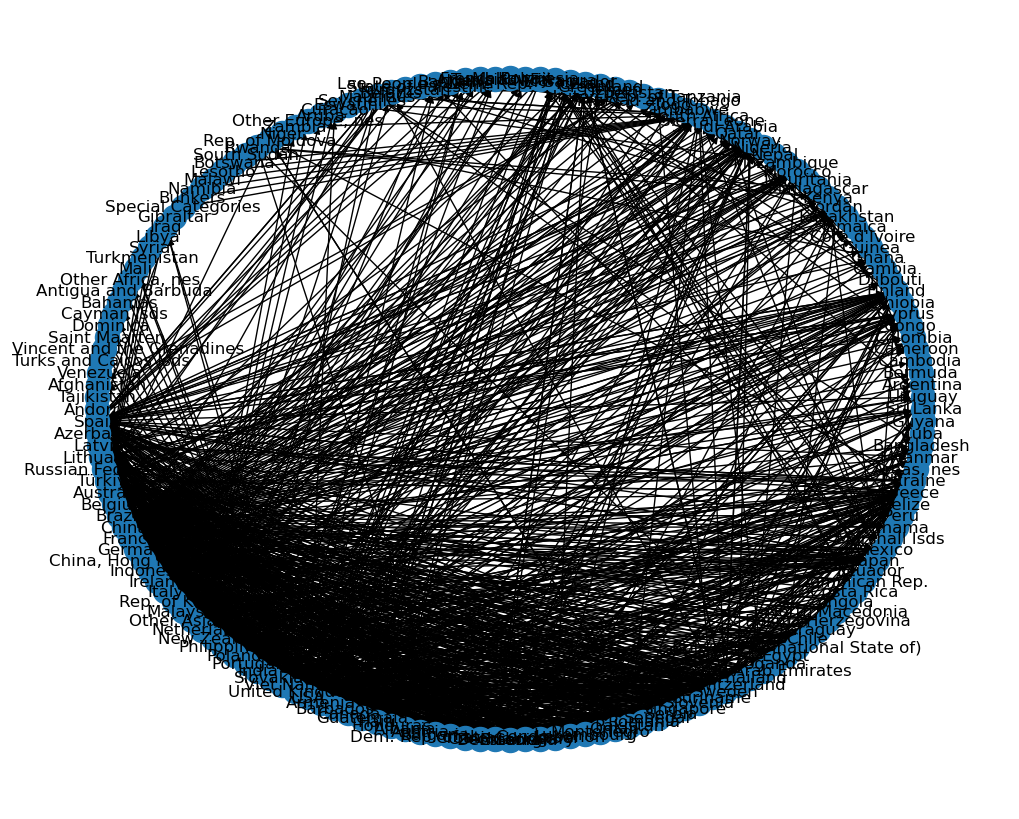

In [33]:
plt.figure(figsize=(10, 8))
nx.draw_shell(net, with_labels=True)

In [39]:
len(set(net.nodes))

172